# Göğüs Tümör Teşhisi İçin Tahmin Analizi



> *Python kullanarak uçtan uca bir sınıflandırma tahmini modelleme makine öğrenimi problemi üzerinde çalışıldı.*

## 1.Proplem Nedir?
Meme kanseri, kadınlar arasında en sık görülen "kötü huylu" malignitedir, Amerika Birleşik Devletleri'ndeki kadınlar arasında teşhis edilen yaklaşık 3 kanserden 1'ini oluşturur ve kadınlar arasında kanser ölümlerinin ikinci önde gelen nedenidir. Meme Kanseri, genellikle Tümör olarak adlandırılan meme dokusundaki hücrelerin anormal büyümesinin bir sonucu olarak ortaya çıkar. Bir tümör, kanser tümörlerinin iyi huylu (kanserli değil), premalign (kanser öncesi) veya kötü huylu (kanserli) olabileceği anlamına gelmez. MRI, mamogram, ultrason ve biyopsi gibi testler, meme kanserini teşhis etmek için yaygın olarak kullanılmaktadır.

### 1.1 Beklenen Sonuçlar
Göğüs ince iğne aspirasyonu (FNA) testinden elde edilen meme kanseri sonucu verilmişse (uygulanması hızlı ve basit bir işlemdir; meme lezyonundan veya kistinden (yumru, yara veya şişlik) bir miktar sıvı veya hücreyi, tıpkı benzer ince bir iğne ile çıkarır. kan örneği iğnesi). Bu, bir göğüs kanseri tümörünü iki eğitim sınıflandırması kullanarak sınıflandırabilen bir model oluşturduğundan:

* 1 = Kötü Huylu (Kanserli) - Mevcut
* 0 = İyi huylu (Kanserli Değil) - Yok

### 1.2 Amaç
Verilerdeki etiketler ayrı olduğundan, tahmin iki kategoriye ayrılır (yani Kötü huylu veya iyi huylu). Makine öğreniminde bu bir sınıflandırma problemidir.

> *Böylece amaç göğüs kanserinin iyi huylu mu yoksa kötü huylu mu olduğunu sınıflandırmak ve belirli bir süre sonra kötü huylu vakaların nüks edip etmeyeceğini tahmin etmektir. Bunu başarmak için, yeni girdinin ayrı sınıfını tahmin edebilen bir işleve uyması için makine öğrenimi sınıflandırma yöntemlerini kullanıldı.*

### 1.3 Veri Kaynakları
Göğüs Kanseri veri kümeleri,https://www.kaggle.com/uciml/breast-cancer-wisconsin-data (Kalifornia Üniversitesi, Irvine tarafından sağlanan mevcut makine öğrenimi havuzudur). Veri seti, 569 kötü huylu ve iyi huylu tümör hücresi örneğini içerir.

Veri kümesindeki ilk iki sütun, örneklerin benzersiz kimlik numaralarını ve karşılık gelen tanıyı (M = kötü huylu, B = iyi huylu) depolar.
3-32 sütunları, bir tümörün iyi huylu veya kötü huylu olup olmadığını tahmin etmek için bir model oluşturmak için kullanılabilen, hücre çekirdeklerinin sayısallaştırılmış görüntülerinden hesaplanan 30 gerçek değerli özelliği içerir.




NOT:
>Çalışma gerçekleştirirken gerekli yerlerde edidleme ve teorik bilgiler için gerekli kütüphanelerin blog sayfalarından alıntı yapılmıştır.Edid yaptığım bir kaç kaynağı buraya ekliyorum:
    >https://numpy.org/
    >https://pandas.pydata.org/
    >https://matplotlib.org/
    >https://seaborn.pydata.org/
    >https://scikit-learn.org/stable/

In [78]:
!python --version

Python 3.8.3


In [1]:
### KÜTÜPHANELER 
%matplotlib inline
from matplotlib import pyplot as plt

#data processing 
import pandas as pd
import numpy as np 
from scipy.stats import norm

## Supervised - unsupervised learning.(gözetimli-gözetimsiz öğrenme)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

#plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

#### Veri Kümesini Yükleme
Pandas read_csv işlevindeki ek seçenekleri kullanarak sağlanan CSV dosyasını yüklenir.

In [2]:
data = pd.read_csv("C:/Users/lenovo/work_file/breast_cancer_project/data.csv",index_col=False)

#### Verilerin İncelenmesi
İlk adım, yeni veri setini görsel olarak incelemektir.
Bunu yapmanın birçok yolu vardır:

**DataFrame data.head ()** yöntemini kullanarak ilk birkaç kaydı istemenin en kolay yolu. Varsayılan olarak, **"data.head  ()"** DataFrame df nesnesinden ilk 5 satırı döndürür (başlık satırı hariç).
* Alternatif olarak, veri çerçevesinin beş satırını döndürmek için **"df.tail ()"** de kullanılabilir.
* Hem head hem de tail yöntemleri için, her iki yöntemi de çağırırken parantezler arasına gerekli sayıyı ekleyerek kayıt sayısını belirtme seçeneği vardır.

In [3]:
data.head(2)
#data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
data_id_diag=data.loc[:,["id","diagnosis"]]

In [5]:
data_id_diag

,id,diagnosis
0,842302,M
1,842517,M
2,84300903,M
3,84348301,M
4,84358402,M
...,...,...
564,926424,M
565,926682,M
566,926954,M
567,927241,M


In [6]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
data.shape # veri setinin satır-stun bilgisi.

(569, 33)

**"İnfo ()"** yöntemi, verilerin kısa bir özetini sağlar; çıktıdan, her sütundaki verilerin türünü, her sütundaki boş olmayan değerlerin sayısını ve veri çerçevesinin ne kadar bellek kullandığını sağlar.

**dtype.value_counts ()** yöntemi, bir DataFrame'deki her bir türün sütun sayısını döndürür:

In [8]:
data.info() # veri türlerinin incelenmesi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

In [10]:
# eksik değişkenlerin kontrolü

#data.isnull().any()
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
#eksik değişken yüzdeleri
data.isna().sum() /data.shape[0]*100 

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

#### Gereksiz Kolonların Düşürülmesi

In [12]:
data.drop('Unnamed: 32', axis=1, inplace=True) 
data.drop('id', axis =1, inplace=True) 

In [13]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [14]:
data.diagnosis.unique() #teşhisteki tekrar eden değerlere bakalım

array(['M', 'B'], dtype=object)

> *Sonuçlardan, teşhisin kategorik bir değişken olduğu görünüyor, çünkü sabit bir olası değer sayısını temsil eder (Benign'ın Malignant'ı) Makine öğrenimi algoritmaları, girdileri olarak dizeleri değil sayıları ister, bu nedenle bazı kodlama yöntemlerine ihtiyacımız var. onları dönüştürün.

# 2. Keşifçi Veri Analizi

Artık veriler hakkında iyi bir sezgisel anlayışa sahip olduğumuza göre,sonraki adım niteliklere ve veri değerlerine daha yakından bakmayı içerir.
## 2.1 Veri Keşfetmenin Amacı?
Keşif veri analizi (EDA), özellik mühendisliği ve verilerin elde edilmesinden sonra gerçekleşen çok önemli bir adımdır ve herhangi bir modellemeden önce yapılmalıdır. Bunun nedeni, bir veri bilimcinin varsayımlarda bulunmadan verilerin doğasını anlayabilmesinin çok önemli olmasıdır. Veri keşfinin sonuçları, verilerin yapısını, değerlerin dağılımını ve veri seti içindeki uç değerlerin ve karşılıklı ilişkilerin varlığını kavramada son derece yararlı olabilir.
> **EDA'nın amacı:**
* Verileri daha iyi anlamak için özet istatistikleri ve görselleştirmeleri kullanmak,
* Verinin eğilimleri, kalitesi ve varsayımları ve analizimizin hipotezi hakkında ipuçları bulmak
* Veri ön işlemenin başarılı olması için, verilerinizin genel bir resmine sahip olmak önemlidir.
Verilerin özelliklerini belirlemek ve hangi veri değerlerinin gürültü veya aykırı değerler olarak ele alınması gerektiğini vurgulamak için temel istatistiksel açıklamalar kullanılabilir. **

Verileri incelemek için kullanılan iki yaklaşım vardır:

2.1. ***Tanımlayıcı istatistikler***, veri kümesinin temel özelliklerini basit sayısal ölçülere yoğunlaştırma sürecidir. Kullanılan yaygın ölçütlerden bazıları ortalama, standart sapma ve korelasyondur.

2.2. ***Görselleştirme***, veriyi veya bir kısmını Kartezyen uzaya veya soyut görüntülere yansıtma işlemidir. Veri madenciliği sürecinde, veri keşfi, sonuçların ön işleme, modelleme ve yorumlanması dahil olmak üzere birçok farklı adımda kullanılır.

# 2.2 Tanımlayıcı İstatistikler
Özet istatistikler, verileri tanımlamayı amaçlayan ölçümlerdir. Tanımlayıcı istatistikler alanında birçok [özet ölçümler] vardır (http://www.saedsayad.com/numerical_variables.htm))

In [15]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [16]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

> *Eğri sonucu, pozitif (sağ) veya negatif (sol) eğriliği gösterir. Sıfıra yakın değerler daha az çarpıklık gösterir. Grafiklerden, bu özelliklerdeki kötü huylu ve iyi huylu kanser türleri arasındaki farklı gruplamadan dolayı, yarıçap_ortalama, çevre_ortalama, alan_ortalama, içbükey_ortalama ve içbükey_ noktalar_ortamının kanser tipini tahmin etmede yararlı olduğunu görebiliriz. Ayrıca, area_worst ve perimeter_worst'un da oldukça yararlı olduğunu görebiliriz*

In [18]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [19]:
# tanıya göre gruplama yapalım.

diag_gr = data.groupby('diagnosis', axis=0) 
pd.DataFrame(diag_gr.size(), columns=['M ve B değerleri'])

,M ve B değerleri
diagnosis,
B,357
M,212



* Kötü huylu (Malignant) = 1 (kanser hücrelerinin varlığını gösterir)
* İyi huylu (Benign) = 0 (yokluğu gösterir)

#####  *SONUÇ* 
> *Kanser hücrelerinin olmadığını gösteren 357 gözlem ve 212'si kanser hücresinin varlığını göstermektedir*

**Histogramı çizerek bunu doğrulayalım** 

# 2.3 Tek Modlu Veri Görselleştirmeleri

Buradaki verileri görselleştirmenin ana hedeflerinden biri, kötü huylu veya iyi huylu kanseri tahmin etmede hangi özelliklerin en yararlı olduğunu gözlemlemektir. Diğeri ise model seçiminde ve hiper parametre seçiminde bize yardımcı olabilecek genel eğilimleri görmektir.

Veri kümenizin her bir özelliğini bağımsız olarak anlamak için kullanabileceğiniz 3 teknik uygulaması:
* Histogramlar.
* Yoğunluk Grafikleri.
* Box ve Whisker Plots.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


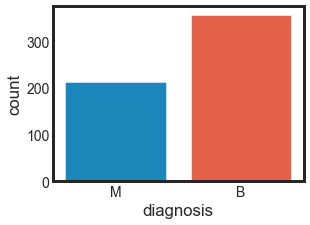

In [20]:
#kanser teşhisinin sıklığını alalım
sns.set_context({"figure.figsize": (4,3)})
sns.countplot(data['diagnosis'])
plt.show()

## 2.3.1 Histogramlar Aracılığıyla Verilerin Dağıtımını Görselleştirme
Histogramlar genellikle sayısal değişkenleri görselleştirmek için kullanılır. Bir histogram, değişkenin değerleri sonlu sayıda aralığa (bölmeler) gruplandırıldıktan (gruplandırıldıktan) sonra çubuk grafiğe benzer.

Histogramlar verileri bölmelerde gruplandırır ve size her bölmedeki gözlemlerin sayısını sağlar. Bölmelerin şeklinden, bir özniteliğin Gauss, çarpık veya üstel bir dağılıma sahip olup olmadığı konusunda hızlı bir şekilde bir fikir edinebilirsiniz. Olası aykırı değerleri görmenize de yardımcı olabilir.

In [22]:
data.head(2) # Veri setini tekrar hatırlayalım.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [23]:
# Görselleştirme gerçekleştirmek için sütunları daha küçük veri çerçevelerine ayıralım.
#(_mean, _se ve __worst) görselleştirme çizimlerini devre dışı bırakmak için Sütunları son ek tanımlarına göre gruplara ayırmak faydalı olur.
data_id_diag = data.loc[:,["diagnosis"]]
data_diag = data.loc[:,["diagnosis"]]

data_mean=data.iloc[:,1:11]
data_se = data.iloc[:,11:21]
data_worst = data.iloc[:,21:]

print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


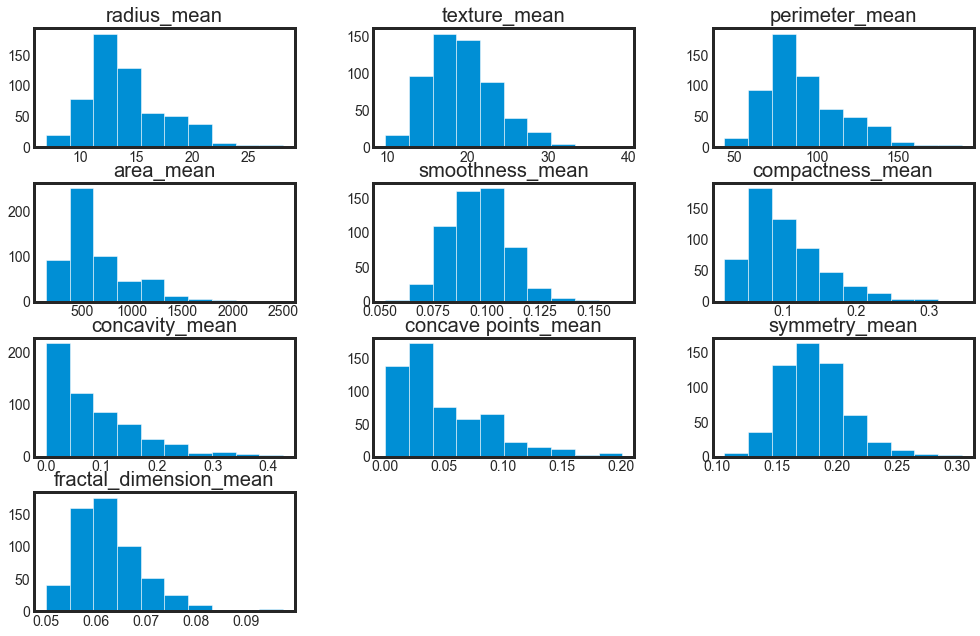

In [24]:
#1. parça (data_mean) değişkenlerin histogramları
hist_mean=data_mean.hist(bins=10, figsize=(15,10), grid=False,)
plt.show()

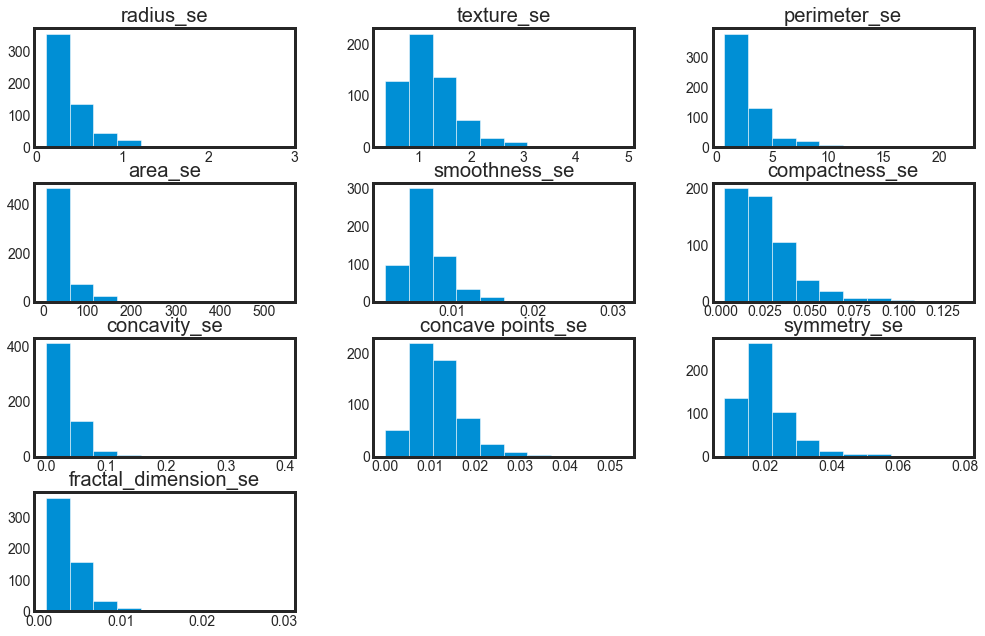

In [25]:
#data_se histogram
#2. parça(se) değişkenlerin histogramları
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,) 
plt.show()

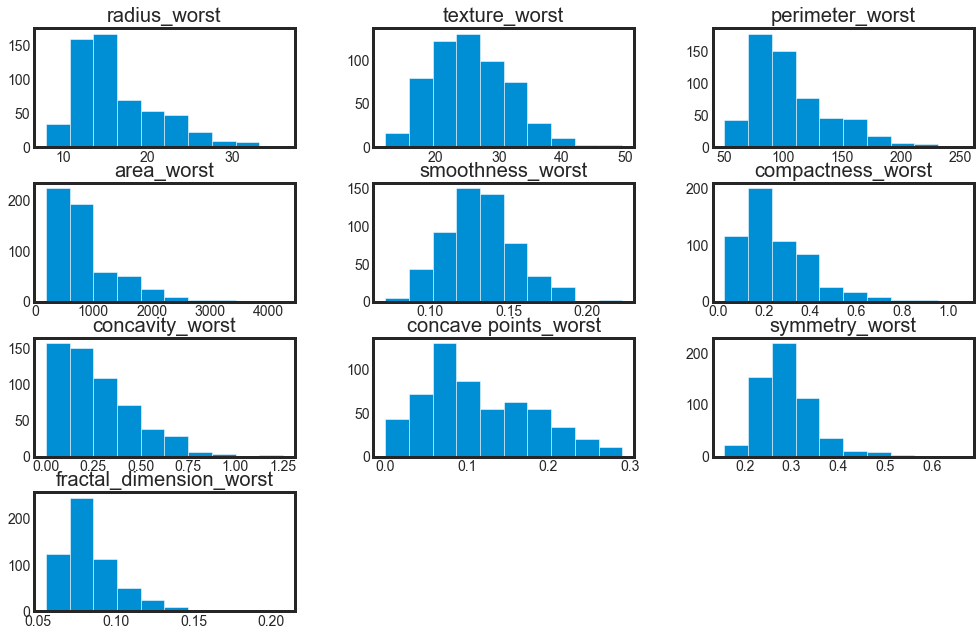

In [26]:
#data_worts histogram
#3. parça(worst) değişkenlerin histogramları
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,) 
plt.show()

## 2.3.2 Yoğunluk(density) Grafikleri Aracılığıyla Verilerin Dağıtımını Görselleştirme

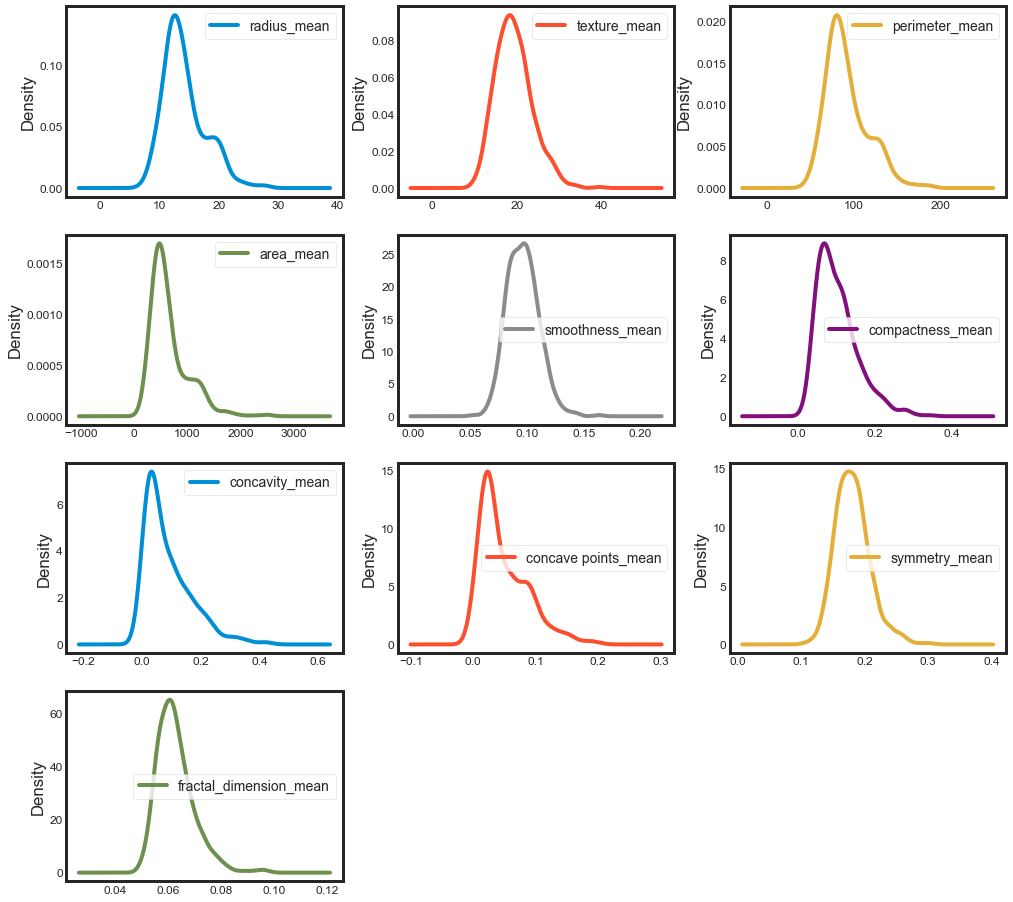

In [27]:
# data_mean Density Plots

plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,15))

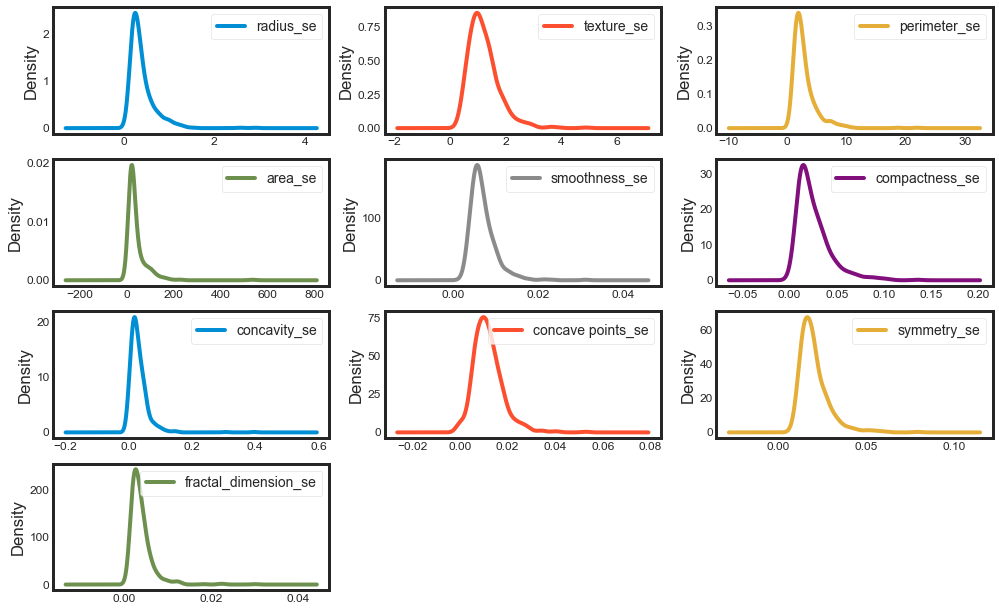

In [28]:
#data_seDensity Plots

plt = data_se.plot(kind = 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False,fontsize=12, figsize=(15,10))


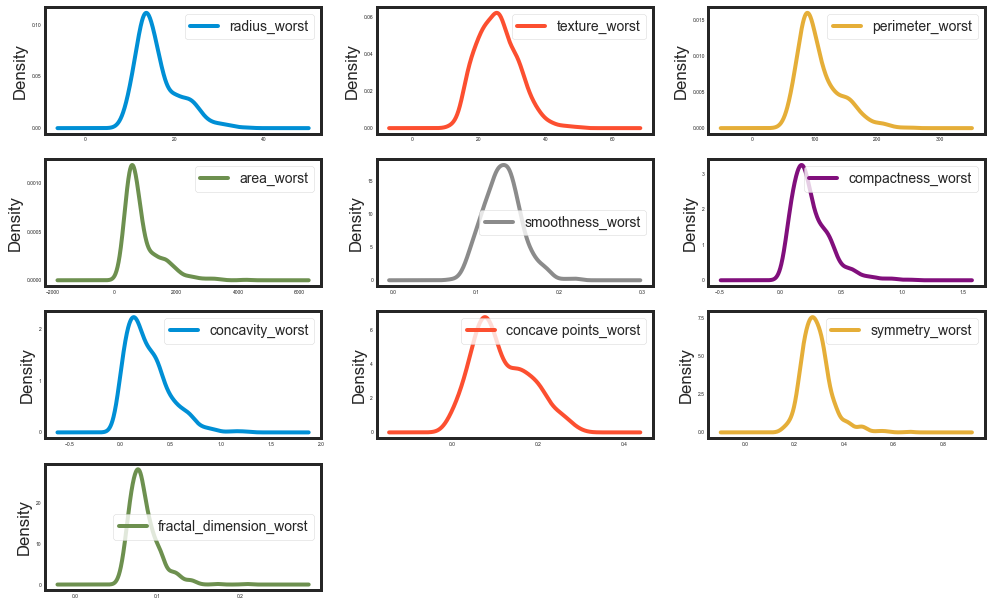

In [29]:
#data_worst Density Plots
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                    figsize=(15,10))

## 2.3.3 Kutu Grafikleri ile Verilerin Dağıtımını Görselleştirme

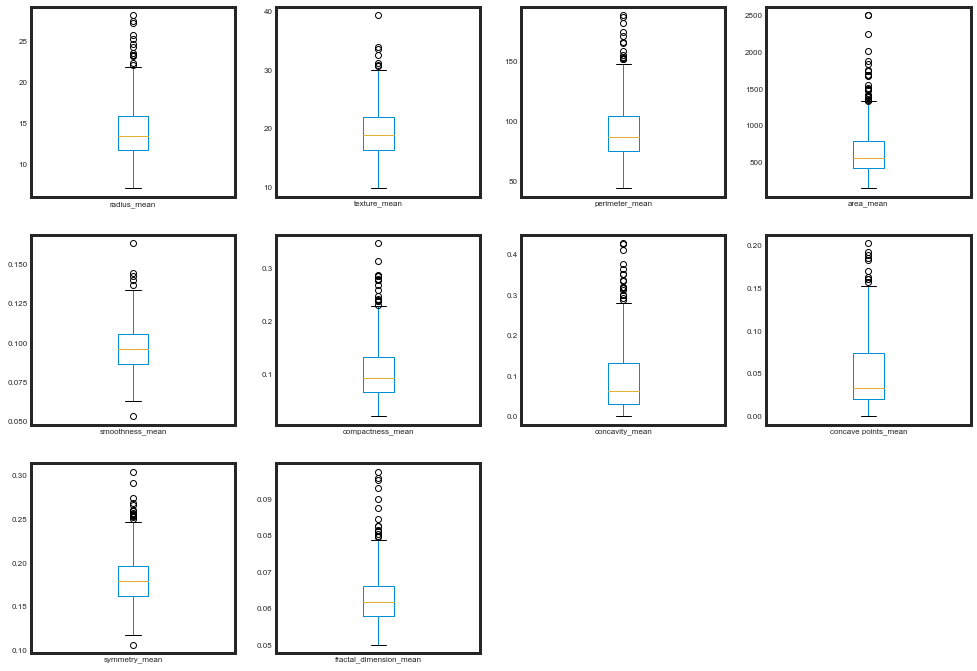

In [30]:
# data_mean box and whisker plots
plt = data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize=(15,15))

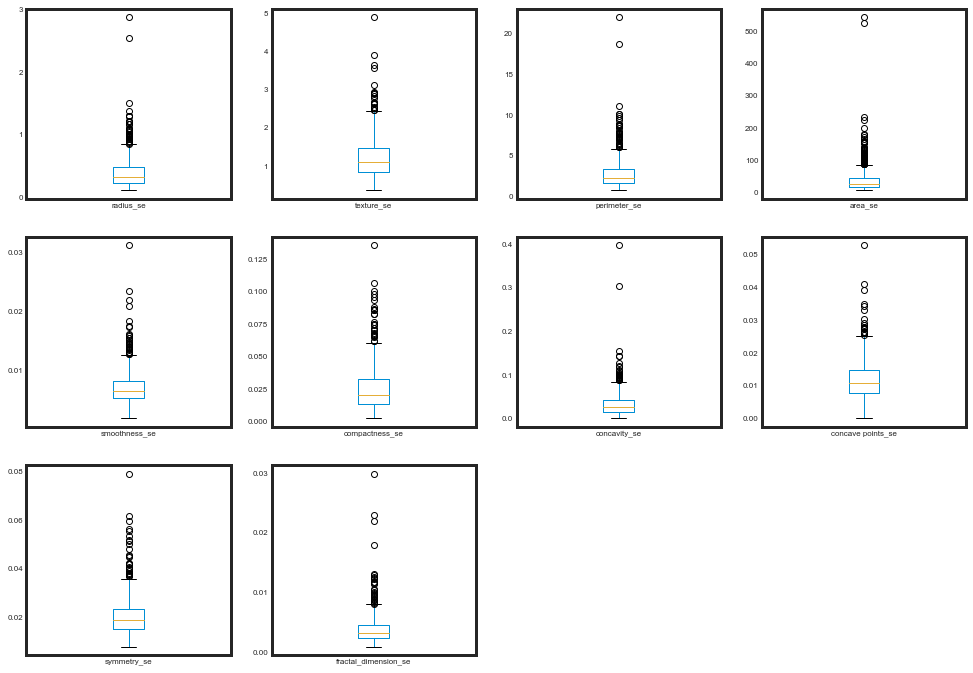

In [31]:
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=(15,15)) # box and whisker plots

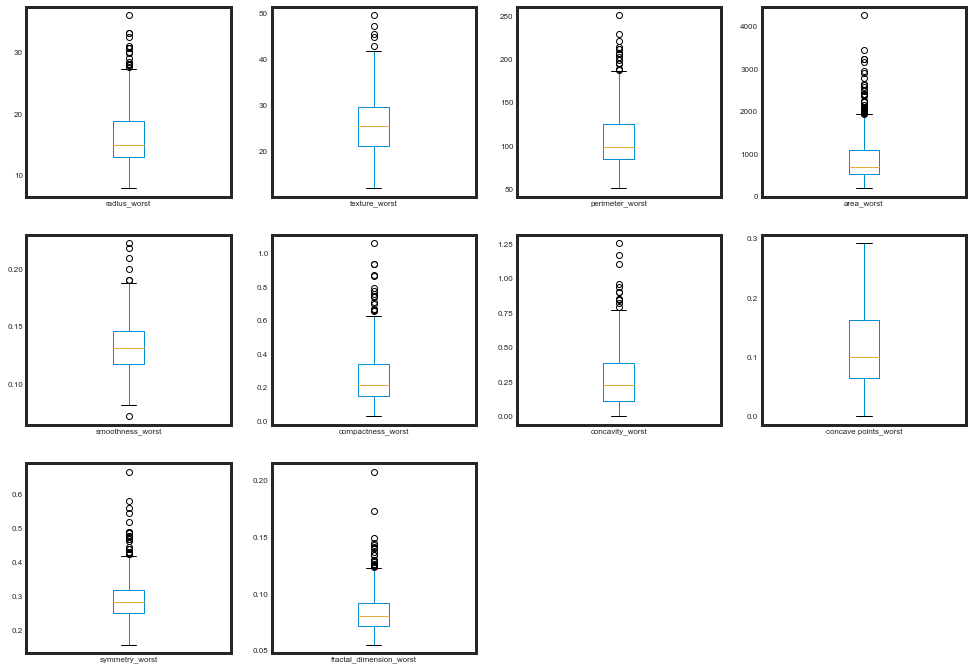

In [32]:
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize=(15,15)) # box and whisker plots

#####  *SONUÇ* 
>Belki de çevre, yarıçap, alan, içbükeylik, çarpma özelliklerinin üstel bir dağılıma sahip olabileceğini görebiliriz (). Ayrıca doku ve pürüzsüz ve simetri niteliklerinin Gauss veya neredeyse Gauss dağılımına sahip olabileceğini de görebiliriz. Bu ilginç çünkü birçok makine öğrenimi tekniği, girdi değişkenleri üzerinde tek değişkenli bir Gauss dağılımı varsayıyor.

## 2.4 Çok Modlu Veri Görselleştirmeleri
* Scatter plots (Dağılım Grafiği)
* Correlation matrix (Korelasyon matrisi)

### Correlation Matrix (Korelasyon Matrisi)

In [33]:
# Compute the correlation matrix
corr = data_mean.corr()

In [34]:
# Üst üçgen için bir maske oluşumu
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

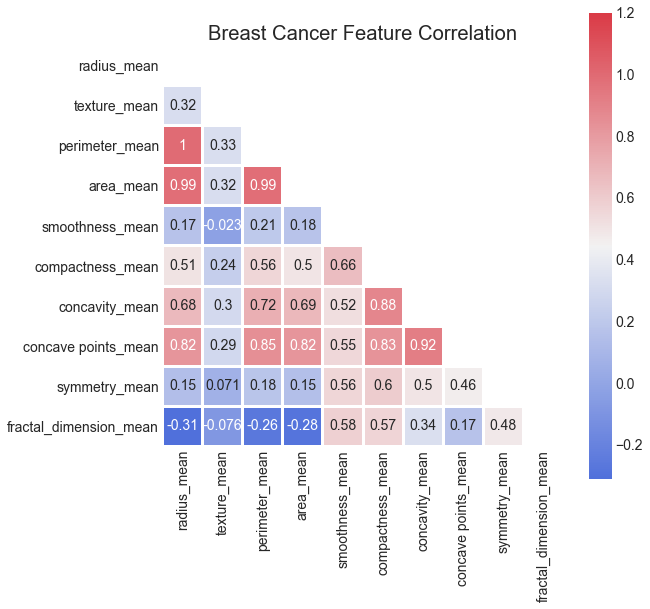

In [35]:
# Matplotlib figürünü ayarı

from matplotlib import pyplot as plt
from scipy.stats import norm

corr_data, ax = plt.subplots(figsize=(8,8))
plt.title('Breast Cancer Feature Correlation')

# özel renk haritası
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Maskeyle ve doğru en boy oranıyla ısı haritası
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,ax=ax,annot=True, fmt='.2g',linewidths=2)

plt.show()

#####  *SONUÇ*   
1-0.75; arasındaki ortalama değerler parametreleri ile güçlü pozitif ilişki olduğunu görebiliriz.
* Doku çekirdeğinin ortalama alanı, ortalama yarıçap ve parametre değerleri ile güçlü bir pozitif korelasyona sahiptir;
* Bazı parametreler orta derecede pozitif düzeltilmiştir (r 0.5-0.75 arasında) içbükeylik ve alan, içbükeylik ve çevre vb.
* Aynı şekilde, fraktal_ boyut ile yarıçap, doku, parametre ortalama değerleri arasında bazı güçlü negatif korelasyon görebiliriz.

In [113]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


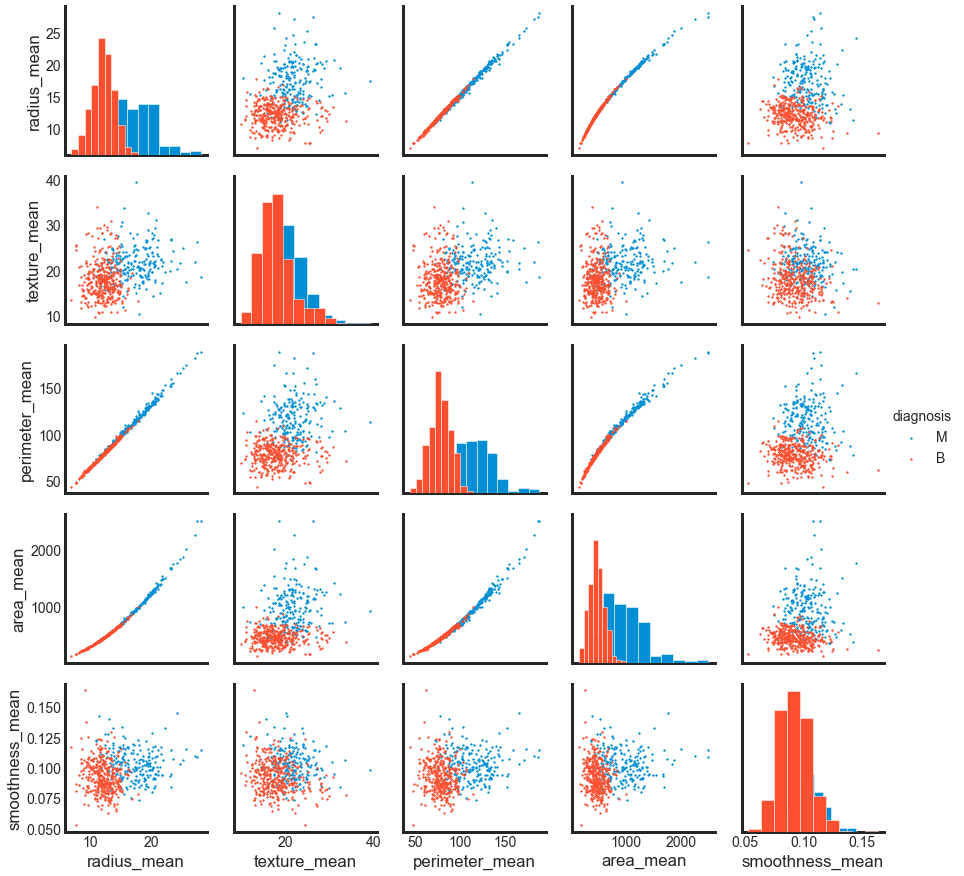

In [36]:
# seaborn kütüphanesindan yararlandık --> https://seaborn.pydata.org/generated/seaborn.PairGrid.html

plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.PairGrid(data[[data.columns[0],data.columns[1],data.columns[2],data.columns[3], data.columns[4],data.columns[5]]], hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s=3)
g.add_legend()
plt.show()

**Buraya kadar uyguladığımız yöntemler sonucunda;**

* Hücre yarıçapı, çevre, alan, kompaktlık, iç bükeylik ve iç bükey noktaların ortalama değerleri kanserin sınıflandırılmasında kullanılabilir. Bu parametrelerin büyük değerleri, kötü huylu tümörler ile bir korelasyon gösterme eğiliminde olduğunu gözlemledik.

* Ortalama doku, pürüzsüzlük, simetri veya fraktal boyut değerleri, bir tanının diğerine göre belirli bir tercihini göstermez.
    
* Histogramların herhangi birinde, daha fazla temizlemeyi garanti eden fark edilebilir büyük aykırı değerler yoktur.(veri seti oldukça temiz)

## 3. Verilerin Ön İşlenmesi

### Giriş

 [Data preprocessing] (http://www.cs.ccsu.edu/~markov/ccsu_courses/datamining-3.html), herhangi bir veri analizi sorunu için çok önemli bir adımdır. Problemin yapısını kullanmayı düşündüğünüz makine öğrenimi algoritmalarına en iyi şekilde açıklayacak şekilde verilerinizi hazırlamak gerekir. Bu,aşağıdakiler gibi bir dizi etkinliği içerir:
 
* Kategorik verilere sayısal değerler atama;
* Eksik değerlerin ele alınması; ve
* Özelliklerin normalleştirilmesi (böylece küçük ölçeklerdeki özellikler, bir modeli veriye sığdırırken baskın olmaz).

### Hedef:
Verinin en tahmin edici özelliklerinin bulunup analiz modelinin tahmin gücünü arttıracak şekilde filtreleme yapılması;


In [37]:
# Öncelikle kullanacağımız kütüphaneleri tekrar tanımlayıp veri setini hatırlayalım, gerçekleştireceğimiz işlemlerde kolaylık sağlayacaktır.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'


In [39]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Label Encoding (Etiket kodlaması)
Burada, 30 özelliği bir NumPy dizisine X atıyorum ve sınıf etiketlerini orijinal dize temsillerinden (M ve B) tamsayılara dönüştürüyorum

In [40]:
data.shape

(569, 31)

In [41]:
# matrix türünde bir değişkene tahminler atandı

array = data.values
X = array[:,1:32]
y = array[:,0]

In [42]:
# sınıf etiketlerini orijinal dize temsillerinden (M ve B) tamsayılara dönüştürme işlemi 
# ---> Uygun bir etiked kodlamasına dönüştürdüm 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)
le.transform (['M', 'B'])

array([1, 0])

*Bir y dizisindeki sınıf etiketlerini (tanı) kodladıktan sonra, kötü huylu tümörler artık sınıf 1 olarak temsil edilir (yani kanser hücrelerinin varlığı) ve iyi huylu tümörler, sırasıyla sınıf 0 olarak temsil edilir (yani kanser hücresi tespiti yok) *, iki kukla değişken üzerinde LabelEncorder'ın dönüştürme yönteminin çağrılmasıyla gösterilmiştir.*


#### Model Doğruluğunu Değerlendirme: Verilerin eğitim ve test setlerine ayrılması

Bir makine öğrenimi algoritmasının performansını değerlendirmenin en basit yöntemi, farklı eğitim ve test veri kümeleri kullanmaktır. Burada yapacağım
* Mevcut verileri bir eğitim seti ve bir test setine bölünsün. (% 70 eğitim,% 30 test)
* Algoritma ilk bölümde eğitilsin,
* ikinci bölümde tahminler yapılsın ve
* tahminleri beklenen sonuçlara göre değerlendirilsin.

Bölmenin boyutu, veri kümenizin boyutuna ve özelliklerine bağlı olabilir, ancak verilerin% 67'sini eğitim için ve kalan% 33'ünü test için kullanmak yaygındır.

In [43]:
#verilerin egitim ve test icin bölünmesi

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

#### Özellik Standardizasyonu

* Standardizasyon, Gauss dağılımına ve farklı ortalamalara ve standart sapmalara sahip öznitelikleri, ortalaması 0 ve standart sapması 1 olan standart bir Gauss dağılımına dönüştürmek için kullanışlı bir tekniktir.

Veri kümesinin standartlaştırılmış bir kopyasıyla aynı algoritmaları değerlendirelim. Burada, verileri ölçeklendirmek ve dönüştürmek için sklearn kullanıyorum, öyle ki her bir özniteliğin ortalama değeri 0 ve standart sapması 1.

In [44]:
# verilerin ölçeklenmesi 
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

#### Temel Bileşen Analizi (PCA) kullanarak özellik ayrıştırma

In [45]:
from sklearn.decomposition import PCA

# özellik çıkarma
pca = PCA(n_components=2)
fit = pca.fit(Xs)

# bileşenleri özetle
print("Açıklanmış Varyans: %s ") # varyans aralığı
print(fit.components_)

Açıklanmış Varyans: %s 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


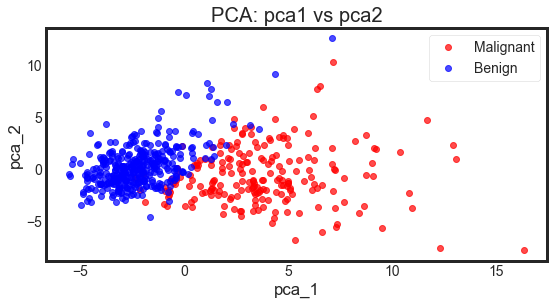

In [46]:
X_pca = pca.transform(Xs)
pca_df = pd.DataFrame()

pca_df['pca_1'] = X_pca[:,0]
pca_df['pca_2'] = X_pca[:,1]

plt.plot(pca_df['pca_1'][data.diagnosis == 'M'],pca_df['pca_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(pca_df['pca_1'][data.diagnosis == 'B'],pca_df['pca_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.legend(['Malignant','Benign'])
plt.title("PCA: pca1 vs pca2")
plt.show()

Şimdi, doğrusal PCA dönüşümünü uyguladıktan sonra elde ettiğimiz şey daha düşük boyutlu bir alt uzaydır (bu durumda 3B'den 2B'ye), burada örnekler yeni özellik eksenleri boyunca "en çok yayılmış".

In [47]:
# Her bir bilgisayarın açıkladığı varyans miktarı
var= pca.explained_variance_ratio_

# Kümülatif Varyans açıklar
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[44.27 63.24]


#### Kaç Temel Bileşenin Elde Edileceğine Karar Verme

In [48]:
#Her bir PC'nin açıkladığı varyans miktarı
var= pca.explained_variance_ratio_

#Kümülatif Varyans açıkları
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)


[44.27 63.24]


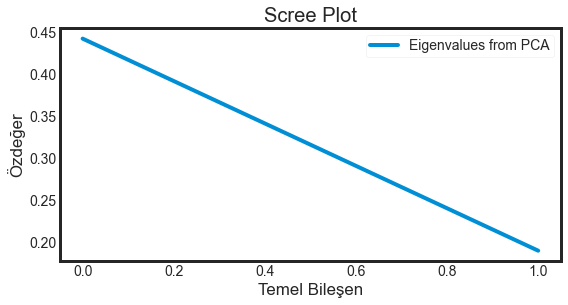

In [49]:
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Temel Bileşen')
plt.ylabel('Özdeğer')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

> #### Sonuç
Yamaç grafiğindeki eğimdeki en belirgin değişiklik, yamaç grafiğinin “dirseği” olan 2. bileşende meydana gelir. Bu nedenle, ilk üç bileşenin muhafaza edilmesi gerektiği kayşat grafiğine dayanılarak tartışılabilir.

### Burada kullanılan Veri Ön İşleme Yaklaşımının Özeti:

1. bir NumPy dizisi X'e özellikler atayın ve sınıf etiketlerini orijinal dize temsillerinden (M ve B) tamsayılara dönüştürün
2. Verileri eğitim ve test setlerine bölün
3. Verileri standartlaştırın.
4. Özvektörleri ve Özdeğerleri kovaryans matrisinden veya korelasyon matrisinden elde edin
5. Özdeğerleri azalan sırada sıralayın ve kk en büyük öz değerlerine karşılık gelen kk özvektörlerini seçin; burada k, yeni özellik alt uzayının boyut sayısıdır (k≤dk≤d).
6. Seçilen k özvektörlerinden projeksiyon matrisini W oluşturun.
7. Orijinal veri kümesini X, k boyutlu bir özellik alt uzayı Y elde etmek için W yoluyla dönüştürün.

>Sınıf etiketleriyle en büyük korelasyona sahip bir özellik alt kümesinin seçilmesi yaygındır. Özellik seçiminin etkisi, size modelinizin gerçek performansının tarafsız bir tahminini vermek için eksiksiz bir modelleme hattında değerlendirilmelidir. Bu nedenle aşağıda model oluşturma boru hattında PCA tabanlı özellik seçim stratejisini uygulamadan önce, ilk olarak çapraz doğrulama yapmak daha uygun olacaktır.

#### Destek Vektör Makinesi (SVM) kullanan Tahmine dayalı model

Tahmine dayalı modeli oluşturmak için destek vektör makineleri (SVM'ler) öğrenme algoritması kullanılacaktır. SVM'ler en popüler sınıflandırma algoritmalarından biridir ve doğrusal olmayan verileri dönüştürmenin zarif bir yoluna sahiptir, böylece verilere doğrusal bir model uydurmak için doğrusal bir algoritma kullanılabilir (Cortes ve Vapnik 1995)

Çekirdekli destek vektörü makineleri güçlü modellerdir ve çeşitli veri kümelerinde iyi performans gösterirler.
1. SVM'ler, verilerin yalnızca birkaç özelliğine sahip olsa bile karmaşık karar sınırlarına izin verir.
2. Düşük boyutlu ve yüksek boyutlu veriler (yani, az ve çok özellik) üzerinde iyi çalışırlar, ancak örneklerin sayısıyla çok iyi ölçeklendirilmezler.
> *10.000 örneğe kadar olan veriler üzerinde bir SVM çalıştırmak iyi sonuç verebilir, ancak 100.000 veya daha büyük veri kümeleriyle çalışmak, çalışma zamanı ve bellek kullanımı açısından zor olabilir.*

3. SVM'ler, verilerin dikkatli bir şekilde ön işlemden geçirilmesini ve parametrelerin ayarlanmasını gerektirir. Bu nedenle, bugünlerde çoğu insan pek çok uygulamada rastgele ormanlar veya gradyan artırma (çok az ön işleme gerektiren veya hiç gerektirmeyen) gibi ağaç tabanlı modeller kullanıyor.
4. SVM modellerinin incelenmesi zordur; Belirli bir tahminin neden yapıldığını anlamak zor olabilir ve modeli uzman olmayan birine açıklamak yanıltıcı olabilir.

### Önemli Parametreler
Çekirdek SVM'lerindeki önemli parametreler,
* Düzenlilik parametresi C,
* Çekirdek seçimi, (doğrusal, radyal temel fonksiyon (RBF) veya polinom)
* Kernel'e özgü parametreler.

gamma ve C'nin her ikisi de modelin karmaşıklığını kontrol eder, büyük değerlerle her ikisi de daha karmaşık bir modelle sonuçlanır. Bu nedenle, iki parametre için iyi ayarlar genellikle güçlü bir şekilde ilişkilidir ve C ve gama birlikte ayarlanmalıdır.

In [128]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


#### Çapraz Doğrulamalı Sınıflandırma

Verileri test ve eğitim setlerine bölmek aşırı uyumu önlemek için çok önemlidir. Bu, daha önce görülmemiş gerçek verilerin genelleştirilmesine izin verir. Çapraz doğrulama, bu fikri daha da genişletir. Tek bir train / test bölmesine sahip olmak yerine, verilerin benzer boyutlu kıvrımlara bölünmesi için *sözde kıvrımlar* belirtiyoruz.

* Eğitim, biri hariç tüm kıvrımlar alınarak gerçekleşir - uzatma örneği olarak adlandırılır.
* Eğitimin tamamlanması üzerine, takılı modelinizin performansını uzatma örneğini kullanarak test edersiniz.

* Uzatma numunesi daha sonra diğer kıvrımların geri kalanıyla birlikte geri atılır ve yeni uzatma numunesi olarak farklı bir kat çekilir.

* Kalan kıvrımlar ile eğitim tekrarlanır ve uzatma örneği kullanılarak performans ölçümü yapılır. Bu süreç, her katın bir test veya uzatma örneği olma şansı olana kadar tekrar edilir.

* Çapraz doğrulama hatası olarak adlandırılan sınıflandırıcının beklenen performansı, daha sonra her bir uzatma örneğinde hesaplanan hata oranlarının ortalamasıdır.

Bu işlem, önce standart bir train /test bölmesi gerçekleştirilerek ve ardından çapraz doğrulama hatası hesaplanarak gösterilir.

In [50]:
# Kayıtları eğitim ve test setlerine ayırdık
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

#Bir SVM sınıflandırıcı oluşturup % 70'i üzerinde eğitelim
clf = SVC(probability=True)
clf.fit(X_train, y_train)

#Uzatma testi örneğinin% 30'undaki tahminlerin doğruluğunu analizi
classifier_score = clf.score(X_test, y_test)
print ('\n Sınıflandırıcı doğruluk puanı: {:03.2f}\n'.format(classifier_score))


 Sınıflandırıcı doğruluk puanı: 0.95



>Tahmin doğruluğunun daha iyi bir ölçüsünü elde etmek için (modelin "uygunluğunun" temsilcisi olarak kullanabilirsiniz), verileri eğitim ve test için kullanacağınız katlara ardarda bölebiliriz:

In [130]:
## Bir SVC tahmincisi kullanarak ortalama 3 kat çapraz doğrulama puanı
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print( '\n Bu sınıflandırıcı için {} katlamalı çapraz doğrulama doğruluk puanı: {:.2f}\n'.format(n_folds, cv_error))


 Bu sınıflandırıcı için 3 katlamalı çapraz doğrulama doğruluk puanı: 0.97



>Yukarıdaki değerlendirmeler, tüm özellik setinin kullanımına dayalıdır. Sınıf etiketleriyle en iyi korelasyona sahip olan 3 özelliği kullanmanın etkisini değerlendirmek için artık korelasyona dayalı özellik seçim stratejisini kullanmak uygun olacaktır:

In [131]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\n Bu sınıflandırıcı için {} katlamalı çapraz doğrulama doğruluk puanı: {:.2f}\n'.format(n_folds, cv_error))


 Bu sınıflandırıcı için 3 katlamalı çapraz doğrulama doğruluk puanı: 0.97



In [132]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print( "Ortalama puan ve belirsizlik: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
Ortalama puan ve belirsizlik: (94.20 +- 0.496)%


### Model Doğruluğu: Alıcı Çalışma Karakteristiği (ROC) eğrisi

İstatistiksel modelleme ve makine öğreniminde, ikili sınıflandırma problemleri için model doğruluğunun yaygın olarak bildirilen performans ölçüsü, Eğri Altındaki Alan'dır (AUC).

ROC eğrisinin hangi bilgileri aktardığını anlamak için, gösterildiği gibi, sınıflandırıcı modelin bir eksende (dikey) ve temel gerçeğin diğer (yatay) eksende olduğu iki boyutlu bir tablo olan sözde karışıklık matrisini düşünün. altında. Bu eksenlerden herhangi biri iki değer alabilir (gösterildiği gibi)

Model "+" | Model "-"
--- | --- | ---
`Gerçek pozitif` | `Yanlış negatif` | **Gerçek: "+"**
 `Yanlış pozitif`| `Gerçek negatif` | Gerçek: "-"
 Bir ROC eğrisinde, Y ekseninde "Gerçek Pozitif Oranı" ve X ekseninde "Yanlış Pozitif Oranı"  çizerilirse; burada "gerçek pozitif", "yanlış negatif", "yanlış pozitif" ve "doğru negatif "yukarıda açıklanan olaylardır (veya olasılıklarıdır). Oranlar aşağıdakilere göre tanımlanır:
> * Gerçek pozitif oran (veya duyarlılık)}: tpr = tp / (tp + fn)
> * Yanlış pozitif oranı: fpr = fp / (fp + tn)
> * Gerçek negatif oran (veya özgüllük): tnr = tn / (fp + tn)

Tüm tanımlarda payda, yukarıdaki karışıklık matrisindeki bir satır marjıdır. Böylece kişi ifade edebilir
* gerçek değer gerçekten "+" olduğunda modelin "+" deme olasılığı olarak gerçek pozitif oran (tpr) (yani, koşullu olasılık). Bununla birlikte, bu size "+" aradığınızda ne kadar doğru olacağınızı söylemez (yani, test sonucunun "+" olmasına bağlı olarak gerçek bir pozitif olma olasılığı).

In [133]:
# Karışıklık matrisi, algoritmanın performansını görselleştirmeye yardımcı olur.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[106,   1],
       [  7,  57]], dtype=int64)

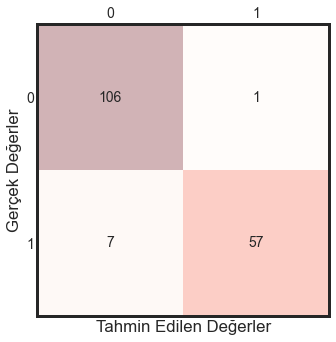

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [134]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Tahmin Edilen Değerler', )
plt.ylabel('Gerçek Değerler')
plt.show()
print(classification_report(y_test, y_pred ))

#precision: kesinlik,
#recall: hatırlama 
#accuracy :doğruluk
#macro avg: makro ortalama
#weighted avg: ağırlık ortalama 

#### Gözlem
Öngörülen iki olası sınıf vardır: "1" ve "0". Kötü huylu = 1 (kanser hücrelerinin varlığını gösterir) ve İyi huylu
= 0 (yokluğu belirtir).

* Sınıflandırıcı toplam 174 tahmin yaptı (yani 174 hasta meme kanseri varlığı açısından test ediliyordu).
* Bu 174 vakadan sınıflandırıcı 58 kez "evet" ve 113 kez "hayır" tahmininde bulundu.
* Gerçekte, örnekteki 64 hastada hastalık var ve 107 hastada yok.

#### Karışıklık matrisinden hesaplanan oranlar
1. **Doğruluk**: Genel olarak, sınıflandırıcı ne sıklıkla doğrudur?
    * (TP + TN) / toplam = (57 + 106) / 171 = 0,95

2. **Yanlış Sınıflandırma Oranı**: Genel olarak, ne sıklıkla yanlıştır?
    * (FP + FN) / toplam = (1 + 7) / 171 = 0,05 eşittir 1 eksi Doğruluk, aynı zamanda *** "Hata Oranı" olarak da bilinir ***

3. **Gerçek Pozitif Oran:** Gerçekten evet olduğunda, ne sıklıkla 1'i tahmin ediyor?
   * TP / gerçek evet = 57/64 = 0,89 "Hassasiyet" veya *** "Geri Çağırma" olarak da bilinir ***

4. **Yanlış Pozitif Oran**: Gerçekte 0 olduğunda, ne sıklıkla 1'i tahmin eder?
   * FP / gerçek hayır = 1/107 = 0.01

5. **Özgüllük**: Gerçekte 0 olduğunda, ne sıklıkla 0'ı tahmin eder? ** gerçek pozitif oran ** olarak da bilinir
   * TN / gerçek hayır = 106/107 = 0.99 1 eksi Yanlış Pozitif Orana eşdeğer

6. **Kesinlik**: 1'i tahmin ettiğinde, ne sıklıkla doğrudur?
   * TP / öngörülen evet = 57/58 = 0,98

7. **Yaygınlık**: Evet durumu örneklemimizde gerçekte ne sıklıkla ortaya çıkıyor?
   * gerçek evet / toplam = 64/171 = 0.34

In [135]:
from sklearn.metrics import roc_curve, auc
#Alıcı çalışma karakteristik eğrisi (ROC) 
plt.figure(figsize=(8,6))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

<Figure size 576x432 with 0 Axes>

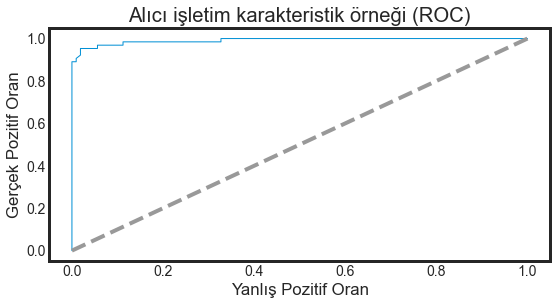

In [136]:
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Yanlış Pozitif Oran')
plt.ylabel('Gerçek Pozitif Oran')
plt.title('Alıcı işletim karakteristik örneği (ROC)')
#plt.axes().set_aspect(1)
plt.show()


* Köşegenin üzerindeki noktalar için tpr> fpr ve model, rastgele değil daha iyi performans gösterdiğiniz bir bölgede olduğunuzu söylüyor. Örneğin, tpr = 0.99 ve fpr = 0.01 varsayalım, O halde, gerçek pozitif grupta olma olasılığı $ (0.99 / (0.99 + 0.01)) = 99 \% $. 

### SVM Sınıflandırıcısını Optimize Etme

Makine öğrenimi modelleri, davranışlarının belirli bir soruna göre ayarlanabilmesi için parametrelendirilir. Modellerin birçok parametresi olabilir ve en iyi parametre kombinasyonunu bulmak, bir arama problemi olarak ele alınabilir. Scikit-learn kullanarak SVM Sınıflandırma modelinin parametreleri.


## Bir sınıflandırıcıyı optimize etmenin önemi

SVM algoritmasının iki temel parametresini ayarlayabiliriz:
* C'nin değeri (marjın ne kadar gevşetileceği)
* ve çekirdek türü.

SVM (SVC sınıfı) için varsayılan, C değeri 1.0 olarak ayarlanmış Radyal Temel Fonksiyonu (RBF) çekirdeğini kullanmaktır. KNN'de olduğu gibi, eğitim veri setinin standartlaştırılmış bir kopyasıyla 10 kat çapraz doğrulama kullanarak bir ızgara araması gerçekleştireceğiz. Daha az önyargı ve daha fazla önyargı (sırasıyla 1.0'dan küçük ve daha fazla) olan bir dizi basit çekirdek türü ve C değeri deneyeceğiz.

Python scikit-learn, algoritma parametresi ayarı için iki basit yöntem sağlar:
  * Grid Search  Parametresi Ayarı.
  * Random Search  Parametre Ayarı.

In [137]:
# sınıflandırıcı eğitimi(train classifiers)
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [138]:
print("En iyi parametreler %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

En iyi parametreler {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.98


In [139]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



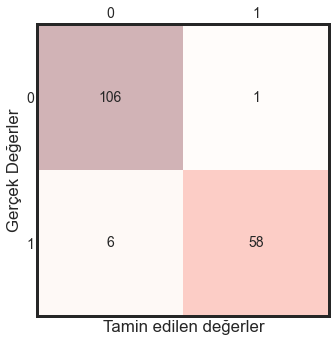

In [140]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Tamin edilen değerler', )
plt.ylabel('Gerçek Değerler')
plt.show()


### Farklı Sınıflandırıcıların Karar Sınırları
Doğrusal, Gauss ve polinom sınıflandırıcıların ürettiği karar sınırlarını görelim.

In [141]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # ağdaki adım boyutu
        
Xtrain = X_train[:, :2] # sadece ilk iki özelliği alıyoruz.

#================================================================
# Renk haritaları
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
#bir SVM örneği oluşturur ve verileri uygularız. 
# Destek vektörlerini çizmek istediğimiz için verilerimizi ölçeklemiyoruz
#================================================================

C = 1.0  # SVM düzenleme parametresi

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [142]:
plt.rcParams['figure.figsize'] = (10,10) 
plt.rcParams['axes.titlesize'] = 'large'
    

#çizmek için bir ağ oluşturun
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots--> grafik başlıkları 
titles = ['Doğrusal çekirdekli SVC',
          'RBF çekirdekli SVC',
          'Polinom (derece 3) çekirdekli SVC']

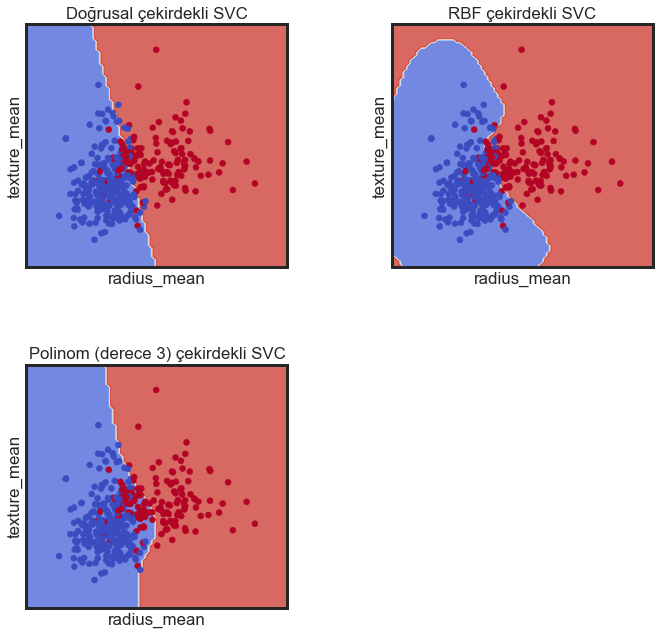

In [143]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Karar sınırını çizip, her birine bir renk atayacağız
    # ağdaki nokta [x_min, x_max]x[y_min, y_max]
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Sonucun renk grafiği
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Eğitim noktaları
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()    

## Sonuçları yorumlandığında:

>Destek Vektör Makinesi kullanılarak sınıflandırma görevi olarak göğüs kanserinin modellenmesini göstermektedir.
SVM, veri kümesi standartlaştırıldığında daha iyi performans gösterir, böylece tüm özniteliklerin ortalama değeri 0 ve standart sapması 1 olur. Bunu tüm eğitim veri setinden hesaplanabilir ve aynı dönüşüm doğrulama veri setinden girdi özelliklerine de  uygulanabilir.

Buradan Sonraki Kısımda:
1. Bulguların özeti ve sonucunu elde edilip
2. Diğer sınıflandırma yöntemleriyle karşılaştırma yapılıyor,
   * Tree.DecisionTreeClassifier () ile karar ağaçları;
   * Komşularla K-nn yakın komşular.KNeighborsClassifier ();
   * Ensemble.RandomForestClassifier () ile Random forests --> rastgele orman;
   * Mlxtend.classifier.Perceptron ile Perceptron (hem gradyan hem de stokastik gradyan); ve
   * Mlxtend.classifier.MultiLayerPerceptron ile çok katmanlı algılayıcı ağı (hem gradyan hem de stokastik gradyan).

## Ardışık düzenleri kullanarak makine öğrenimi sürecini otomatikleştirme:

Bir makine öğrenimi projesinde otomatikleştirilebilen standart iş akışları vardır. Python scikit-learn'de Boru Hatları, bu iş akışlarının net bir şekilde tanımlanmasına ve otomatikleştirilmesine yardımcı olur.
* Ardışık düzenler, test koşumunuzdaki veri sızıntısı gibi yaygın sorunların üstesinden gelmenize yardımcı olur.
* Python scikit-learn, makine öğrenimi iş akışlarını otomatikleştirmeye yardımcı olacak bir Pipeline yardımcı programı sağlar.
* Boru hatları, değerlendirilebilecek bir modelleme süreciyle sonuçlanan doğrusal bir veri dönüşüm dizisinin birbirine zincirlenmesine izin vererek çalışır.



### Bazı Algoritma Değerlendirmeleri
Verilerin bazı modellerini oluşturup  görünmeyen veriler üzerindeki doğruluğunun tahmin edilmesi. Bu adım sıra ile 
1. Bir doğrulama veri kümesini ayırma
2. 10 kat çapraz doğrulama kullanmak için test kablo demetinin kurulumu
3. 5 farklı model oluşturup en iyi modelin bulunması 
şeklindedir.

## 1.0 Doğrulama Veri Kümesi

In [144]:
data.head(2) # Veri setini hatırlayalım

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [145]:
#Nokta Kontrol Algoritmaları
models = []
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'SVM' , SVC()))


In [146]:
# basit haliyle knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) # knn ile x_test üzerinde tahmin gerçekleştir
cm = confusion_matrix(y_test, y_pred) # çıkan sonuçları  confusion_matrix olarak göster.
acc = accuracy_score(y_test, y_pred)
score = knn.score(X_test, y_test)


In [147]:
print("Score: ",score)
print("CM: ",cm)
print("Basic KNN Acc: ",acc)

Score:  0.9532163742690059
CM:  [[107   0]
 [  8  56]]
Basic KNN Acc:  0.9532163742690059


In [148]:
def KNN_Best_Params(x_train, x_test, y_train, y_test): # metot haline getirdim ilerki zamanda kullanacağız.
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("En iyi eğitim puanı: {} parametrelerle: {}".format(grid.best_score_, grid.best_params_))
    print() # aralarda boşluklarla yazdırmak istedim
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid
    
    
grid = KNN_Best_Params(X_train, X_test, y_train, y_test)
    


En iyi eğitim puanı: 0.9798076923076924 parametrelerle: {'n_neighbors': 3, 'weights': 'uniform'}

Test Score: 0.9532163742690059, Train Score: 0.992462311557789

CM Test:  [[106   1]
 [  7  57]]
CM Train:  [[250   0]
 [  3 145]]



En iyi eğitim puanı: 0.9882059800664452 parametrelerle: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.986013986013986, Train Score: 1.0

CM Test:  [[88  1]
 [ 1 53]]
CM Train:  [[268   0]
 [  0 158]]


<ipython-input-154-3cbc1641bab4>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Text(0.5, 1.0, "2-Sınıf sınıflandırması (k = 1, ağırlık = 'uniform')")

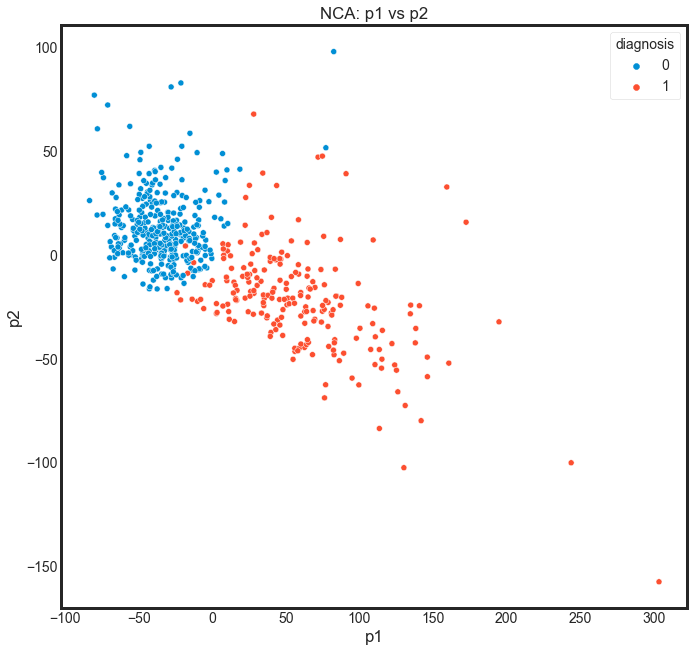

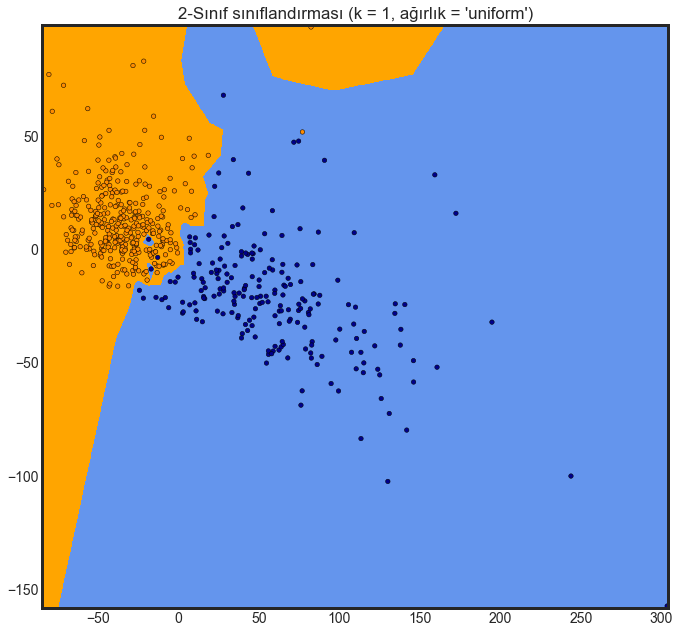

In [154]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(X_scaled, y)
X_reduced_nca = nca.transform(X_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["diagnosis"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "diagnosis", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

# görselleştirme 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # ağdaki adım boyutu
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Sonucun renk grafiğinde gösterimi
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Eğitim noktaların çizimi
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Sınıf sınıflandırması (k = %i, ağırlık = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))



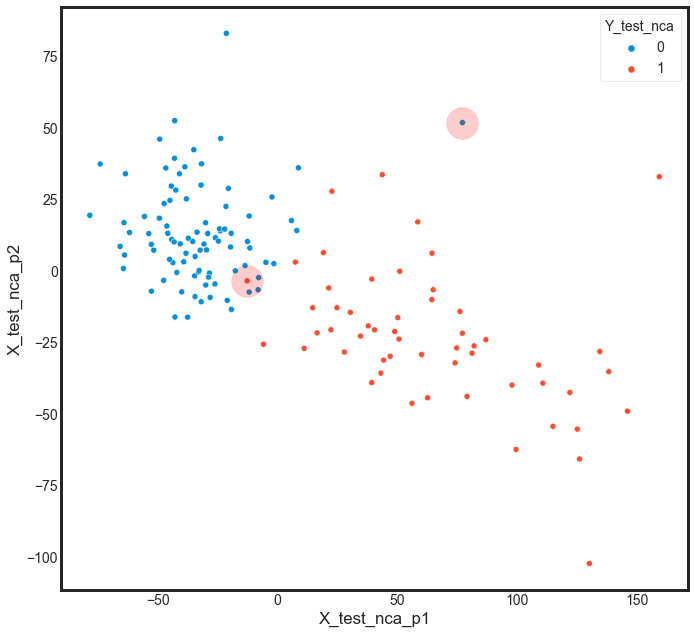

In [155]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Yanlış Sınıflandırılmış",alpha = 0.2,color = "red",s = 1000)



### NİHAİ SONUÇ:
Python kullanarak uçtan uca bir sınıflandırma tahmini modelleme makine öğrenimi problemi üzerinde çalışıldı. Özellikle, kapsanan adımlar şunlardı:

Problem Tanımı.
Veri Kümesini Yükleme.
Verileri Analiz Edin (aynı ölçek ancak diğer veri dağılımları).
Algoritmaları değerlendirin (KNN iyi görünüyordu).
Algoritmaları Standardizasyonla Değerlendirme 